In [1]:
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.exceptions import NotFittedError
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from mlxtend.classifier import StackingClassifier
from typing import Dict

from transformers.columnSelectorTransformer import ColumnSelectorTransformer
from transformers.woeTransformer import WOETransformer
from transformers.binningTransformer import BinningTransformer

In [2]:
from bins import bins

In [3]:
dataset = pd.read_csv('../files/credit_risk_data_v2.csv', low_memory=False)

In [4]:
cols_to_keep = ['loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'purpose',
       'addr_state', 'dti', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee',
       'last_pymnt_amnt',
       'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'status']

In [5]:
column_t = ColumnSelectorTransformer(columns=cols_to_keep)
binning_t = BinningTransformer(bins=bins)
woe_t = WOETransformer(columns=cols_to_keep)

In [6]:
dataset_c = column_t.transform(dataset)
dataset_c.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,status
0,5000,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,0.0,5861.071414,5000.00,861.07,0.00,171.62,NaN,NaN,NaN,0
1,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,0.0,1008.710000,456.46,435.17,0.00,119.66,NaN,NaN,NaN,1
2,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,0.0,3003.653644,2400.00,603.65,0.00,649.91,NaN,NaN,NaN,0
3,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,0.0,12226.302210,10000.00,2209.33,16.97,357.48,NaN,NaN,NaN,0
4,3000,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,...,766.9,3242.170000,2233.10,1009.07,0.00,67.79,NaN,NaN,NaN,0


In [7]:
dataset_c = column_t.clean(X=dataset_c)
dataset_c.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,status
42535,27050,27050,36 months,10.99,885.46,B,B2,10+ years,OWN,55000.0,...,10018.90,21251.04,17031.10,4219.94,0.0,885.46,0.0,114834.0,59900.0,0
42536,9750,9750,36 months,13.98,333.14,C,C1,1 year,RENT,26000.0,...,3710.96,7994.83,6039.04,1955.79,0.0,333.14,0.0,14123.0,15100.0,0
42537,12000,12000,36 months,6.62,368.45,A,A2,10+ years,MORTGAGE,105000.0,...,4266.62,8842.80,7733.38,1109.42,0.0,368.45,0.0,267646.0,61100.0,0
42538,12000,12000,36 months,13.53,407.40,B,B5,10+ years,RENT,40000.0,...,0.00,13359.77,11999.99,1359.78,0.0,119.17,15386.0,13605.0,8100.0,0
42539,15000,15000,36 months,8.90,476.30,A,A5,2 years,MORTGAGE,63000.0,...,5449.27,11431.20,9550.73,1880.47,0.0,476.30,1514.0,272492.0,15400.0,0


In [8]:
dataset_c = column_t.undersampling(X=dataset_c, y='status')
dataset_c.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,status
0,25000,25000,60 months,14.30,585.61,C,C1,10+ years,MORTGAGE,60000.0,...,16678.72,14640.250000,8321.28,6318.97,0.0,585.61,0.0,104064.0,30500.0,0
1,25000,25000,60 months,14.98,594.49,C,C3,7 years,MORTGAGE,82000.0,...,17529.68,13673.270000,7470.32,6202.95,0.0,594.49,0.0,254150.0,63200.0,0
2,10000,10000,36 months,18.55,364.29,D,D2,10+ years,RENT,89000.0,...,0.00,10472.830000,9999.99,472.84,0.0,51.38,0.0,60834.0,4900.0,0
3,5000,5000,36 months,7.90,156.46,A,A4,3 years,OWN,80000.0,...,0.00,5573.942773,5000.00,573.94,0.0,1346.07,0.0,19319.0,46400.0,0
4,6000,6000,36 months,14.30,205.95,C,C1,8 years,RENT,75000.0,...,2111.65,5148.000000,3888.35,1259.65,0.0,205.95,0.0,30785.0,21700.0,0


In [9]:
dataset_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75362 entries, 0 to 75361
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            75362 non-null  int64  
 1   funded_amnt          75362 non-null  int64  
 2   term                 75362 non-null  object 
 3   int_rate             75362 non-null  float64
 4   installment          75362 non-null  float64
 5   grade                75362 non-null  object 
 6   sub_grade            75362 non-null  object 
 7   emp_length           75362 non-null  object 
 8   home_ownership       75362 non-null  object 
 9   annual_inc           75362 non-null  float64
 10  verification_status  75362 non-null  object 
 11  purpose              75362 non-null  object 
 12  addr_state           75362 non-null  object 
 13  dti                  75362 non-null  float64
 14  revol_bal            75362 non-null  int64  
 15  revol_util           75362 non-null 

In [10]:
x_train_c = dataset_c.drop("status", axis=1)
y_train = dataset_c["status"]
x_train_c.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,25000,25000,60 months,14.30,585.61,C,C1,10+ years,MORTGAGE,60000.0,...,w,16678.72,14640.250000,8321.28,6318.97,0.0,585.61,0.0,104064.0,30500.0
1,25000,25000,60 months,14.98,594.49,C,C3,7 years,MORTGAGE,82000.0,...,f,17529.68,13673.270000,7470.32,6202.95,0.0,594.49,0.0,254150.0,63200.0
2,10000,10000,36 months,18.55,364.29,D,D2,10+ years,RENT,89000.0,...,w,0.00,10472.830000,9999.99,472.84,0.0,51.38,0.0,60834.0,4900.0
3,5000,5000,36 months,7.90,156.46,A,A4,3 years,OWN,80000.0,...,f,0.00,5573.942773,5000.00,573.94,0.0,1346.07,0.0,19319.0,46400.0
4,6000,6000,36 months,14.30,205.95,C,C1,8 years,RENT,75000.0,...,f,2111.65,5148.000000,3888.35,1259.65,0.0,205.95,0.0,30785.0,21700.0


In [11]:
x_train_b = binning_t.transform(x_train_c)
x_train_b.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,"(18000.0,inf)","(20429.0,25286.0)",60 months,"(12.0,17.0)","(486.0,717.0)",C,C1,10+ years,MORTGAGE,"(7000.0,178500.0)",...,w,"(8040.0,inf)","(7000.0,25000.0)","(5833.0,11667.0)","(6139.0,9208.0)","(-inf,2.0)","(-inf,6007.0)","(-inf,3000.0)","(-inf,500000.0)","(20000.0,40000.0)"
1,"(18000.0,inf)","(20429.0,25286.0)",60 months,"(12.0,17.0)","(486.0,717.0)",C,C3,7 years,MORTGAGE,"(7000.0,178500.0)",...,f,"(8040.0,inf)","(7000.0,25000.0)","(5833.0,11667.0)","(6139.0,9208.0)","(-inf,2.0)","(-inf,6007.0)","(-inf,3000.0)","(-inf,500000.0)","(60000.0,inf)"
2,"(9500.0,18000.0)","(5857.0,10714.0)",36 months,"(17.0,20.0)","(254.0,486.0)",D,D2,10+ years,RENT,"(7000.0,178500.0)",...,w,"(-inf,2000.0)","(7000.0,25000.0)","(5833.0,11667.0)","(-inf,1000)","(-inf,2.0)","(-inf,6007.0)","(-inf,3000.0)","(-inf,500000.0)","(-inf,20000.0)"
3,"(1000.0,9500.0)","(1000.0,5857.0)",36 months,"(-inf,9.0)","(23.0,254.0)",A,A4,3 years,OWN,"(7000.0,178500.0)",...,f,"(-inf,2000.0)","(-inf,7000)","(-inf,5833.0)","(-inf,1000)","(-inf,2.0)","(-inf,6007.0)","(-inf,3000.0)","(-inf,500000.0)","(40000.0,60000.0)"
4,"(1000.0,9500.0)","(5857.0,10714.0)",36 months,"(12.0,17.0)","(23.0,254.0)",C,C1,8 years,RENT,"(7000.0,178500.0)",...,f,"(2000.0,8040.0)","(-inf,7000)","(-inf,5833.0)","(1000.0,3069.0)","(-inf,2.0)","(-inf,6007.0)","(-inf,3000.0)","(-inf,500000.0)","(20000.0,40000.0)"


Bins were selected based on histograms made with the data, and adjusted for the effect of outliers. Always making sure there's at least around a 0.04 of IV for that bin

In [12]:
woe_t.fit(x_train_b, y_train)


WOETransformer(columns=['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'addr_state', 'dti', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'last_pymnt_amnt', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'status'], target_mappings={0: 'good', 1: 'bad'})

In [13]:
x_train_b["loan_amnt"].value_counts()

loan_amnt
(9500.0,18000.0)    30926
(18000.0,inf)       23735
(1000.0,9500.0)     20541
(-inf,1000.0)         160
Name: count, dtype: int64

In [14]:

woe_t.transform(x_train_b).head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,-0.052340,0.006831,-0.260854,0.000430,-0.070657,-0.053435,0.113274,0.102840,0.143572,-0.01175,...,0.149141,1.038230,0.463415,0.747297,0.125020,0.082051,-0.228865,-0.003029,-0.014988,-0.006193
1,-0.052340,0.006831,-0.260854,0.000430,-0.070657,-0.053435,-0.079615,-0.054376,0.143572,-0.01175,...,-0.095630,1.038230,0.463415,0.747297,0.125020,0.082051,-0.228865,-0.003029,-0.014988,0.490093
2,-0.010994,0.026456,0.124963,-0.550966,-0.024024,-0.418535,-0.419312,0.102840,-0.174877,-0.01175,...,0.149141,-0.622209,0.463415,0.747297,-0.173128,0.082051,-0.228865,-0.003029,-0.014988,-0.135211
3,0.073545,0.109302,0.124963,1.282056,0.178507,1.273492,1.113490,-0.031643,0.041779,-0.01175,...,-0.095630,-0.622209,-0.643936,-0.706168,-0.173128,0.082051,-0.228865,-0.003029,-0.014988,0.198870
4,0.073545,0.026456,0.124963,0.000430,0.178507,-0.053435,0.113274,-0.042903,-0.174877,-0.01175,...,-0.095630,1.290653,-0.643936,-0.706168,0.037963,0.082051,-0.228865,-0.003029,-0.014988,-0.006193


woe_t.transform(x_train_b).head()
# WOE

Now that we transform our data to the respective Weight of Evidence, we can get the mappings for a given column to analyze the WoE and IV, and determine if our bins have a good predictive power, or if we need to re-structure them.

In [15]:
for i in cols_to_keep:
       print(i,":",woe_t.woe_mappings[i]["info_val"].sum())

loan_amnt : 0.002823177930882114
funded_amnt : 0.003900156836676852
term : 0.0325089590182481
int_rate : 0.3578972808304079
installment : 0.00905740376902571
grade : 0.31851996178469905
sub_grade : 0.3489671658529929
emp_length : 0.006405671593878077
home_ownership : 0.023373717097461923
annual_inc : 0.005800187221555119
verification_status : 0.026829507506928148
purpose : 0.028198574288290573
addr_state : 0.011918812018158462
dti : 0.035470914795251954
revol_bal : 0.0010715954054251566
revol_util : 0.017626268152784914
total_acc : 0.00344222994167691
initial_list_status : 0.01424544759039011
out_prncp : 0.6810895974137804
total_pymnt : 0.43822914911048944
total_rec_prncp : 0.9943627246497003
total_rec_int : 0.013136672853404259
total_rec_late_fee : 0.16842238999377374
last_pymnt_amnt : 1.1329261924201257
tot_coll_amt : 0.0014278232575042047
tot_cur_bal : 0.010200441324847815
total_rev_hi_lim : 0.03215424566140417
status : 0.0


In [16]:
woe_t.woe_mappings["int_rate"]

,int_rate,good,bad,woe,info_val
3,"(20.0,inf)",0.085481,0.197314,-0.836507,9.354951e-02
2,"(17.0,20.0)",0.132056,0.229108,-0.550966,5.347208e-02
1,"(12.0,17.0)",0.432021,0.431836,0.000430,7.989863e-08
4,"(9.0,12.0)",0.189565,0.097105,0.668943,6.185073e-02
0,"(-inf,9.0)",0.160877,0.044638,1.282056,1.490249e-01


In [17]:
woe_t.woe_mappings["grade"]

,grade,good,bad,woe,info_val
6,G,0.005971,0.017569,-1.079165,0.012515
5,F,0.026326,0.064170,-0.890973,0.033718
4,E,0.071203,0.141132,-0.684162,0.047843
3,D,0.159364,0.242191,-0.418535,0.034666
2,C,0.278496,0.293782,-0.053435,0.000817
1,B,0.300178,0.196810,0.422136,0.043635
0,A,0.158462,0.044346,1.273492,0.145326


In [18]:
woe_t.woe_mappings["sub_grade"]

,sub_grade,good,bad,woe,info_val
30,G1,0.001884,0.006396,-1.222117,0.005514
29,F5,0.002627,0.008864,-1.216021,0.007584
31,G2,0.001353,0.004113,-1.111599,0.003068
34,G5,0.000690,0.002017,-1.072637,0.001423
32,G3,0.001194,0.003370,-1.037525,0.002258
27,F3,0.005281,0.013933,-0.970093,0.008393
28,F4,0.004273,0.010589,-0.907557,0.005732
24,E5,0.009474,0.022664,-0.872195,0.011504
26,F2,0.006183,0.014119,-0.825605,0.006551
23,E4,0.011518,0.025955,-0.812465,0.011730


In [19]:
woe_t.woe_mappings["out_prncp"]

,out_prncp,good,bad,woe,info_val
0,"(-inf,2000.0)",0.441788,0.823067,-0.622209,0.237236
2,"(8040.0,inf)",0.295905,0.104774,1.038230,0.198438
1,"(2000.0,8040.0)",0.262307,0.072158,1.290653,0.245416


In [20]:
woe_t.woe_mappings["total_pymnt"]

,total_pymnt,good,bad,woe,info_val
0,"(-inf,7000)",0.323028,0.615031,-0.643936,0.188032
2,"(7000.0,25000.0)",0.595791,0.374831,0.463415,0.102396
1,"(25000.0,inf)",0.081181,0.010138,2.080423,0.147801


In [21]:
woe_t.woe_mappings["total_rec_prncp"]

,total_rec_prncp,good,bad,woe,info_val
0,"(-inf,5833.0)",0.402962,0.816486,-0.706168,0.292017
4,"(5833.0,11667.0)",0.319710,0.151429,0.747297,0.125756
1,"(11667.0,17500.0)",0.147103,0.024999,1.772286,0.216403
2,"(17500.0,22000.0)",0.062923,0.003981,2.760432,0.162706
3,"(22000.0,inf)",0.067302,0.003105,3.076169,0.197480


In [22]:
woe_t.woe_mappings["last_pymnt_amnt"]

,last_pymnt_amnt,good,bad,woe,info_val
0,"(-inf,6007.0)",0.794591,0.998938,-0.228865,0.046768
2,"(18022.0,23000.0)",0.022160,0.000212,4.647990,0.102011
3,"(23000.0,inf)",0.021098,0.000159,4.886583,0.102320
1,"(12015.0,18022.0)",0.057456,0.000265,5.377591,0.307548
4,"(6007.0,12015.0)",0.104695,0.000425,5.507616,0.574279


In [23]:
woe_t.woe_mappings["addr_state"]

,addr_state,good,bad,woe,info_val
28,NV,0.013243,0.017330,-0.268971,1.099269e-03
11,HI,0.005281,0.006847,-0.259655,4.065612e-04
36,SD,0.001805,0.002203,-0.199333,7.935016e-05
37,TN,0.013774,0.016454,-0.177816,4.766162e-04
16,LA,0.011040,0.012924,-0.157579,2.969162e-04
9,FL,0.065338,0.074361,-0.129359,1.167225e-03
1,AL,0.013163,0.014410,-0.090533,1.129235e-04
40,VA,0.030281,0.032775,-0.079166,1.974893e-04
29,NY,0.085162,0.091372,-0.070384,4.370854e-04
20,MN,0.016852,0.018073,-0.069937,8.537767e-05


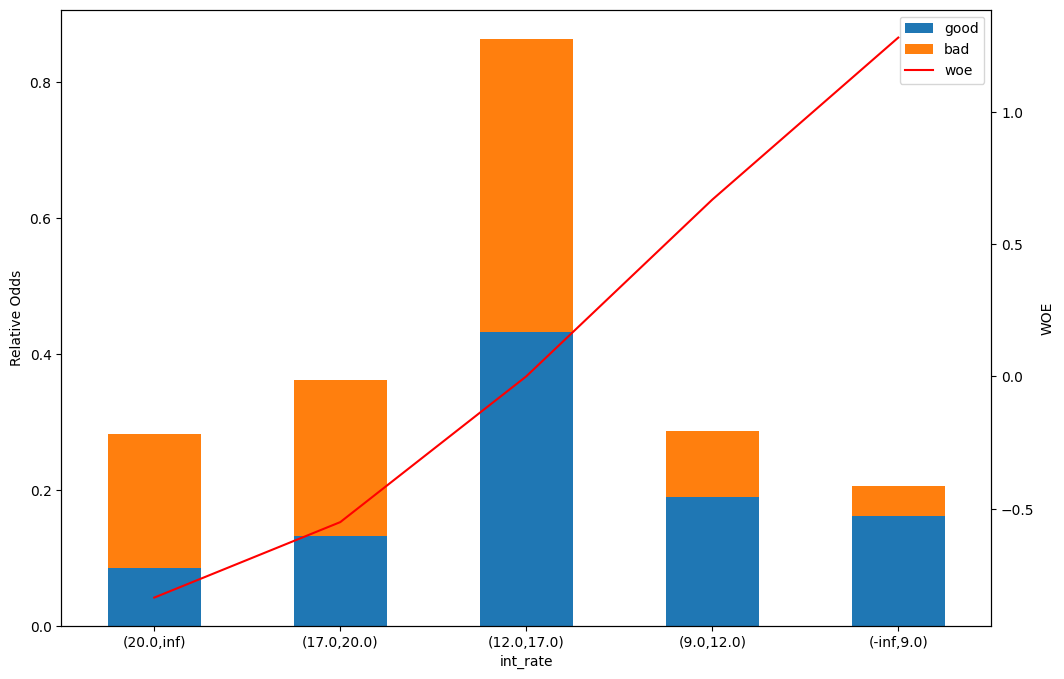

In [24]:
ax = woe_t.woe_mappings["int_rate"].plot.bar(
    x="int_rate", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["int_rate"].plot(
    x="int_rate", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

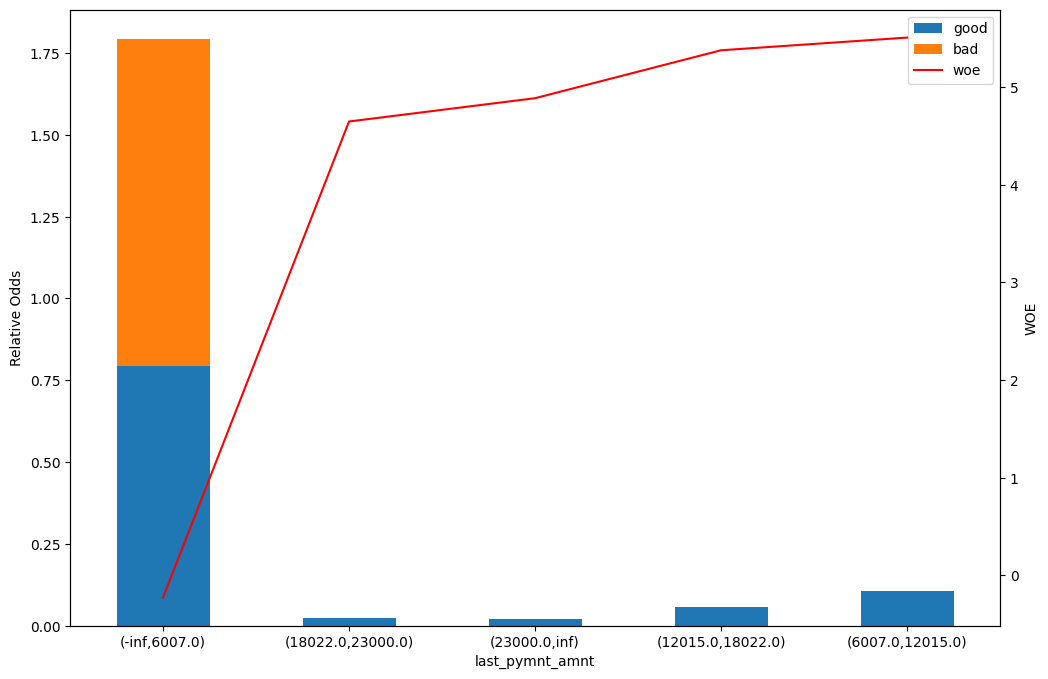

In [25]:
ax = woe_t.woe_mappings["last_pymnt_amnt"].plot.bar(
    x="last_pymnt_amnt", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["last_pymnt_amnt"].plot(
    x="last_pymnt_amnt", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

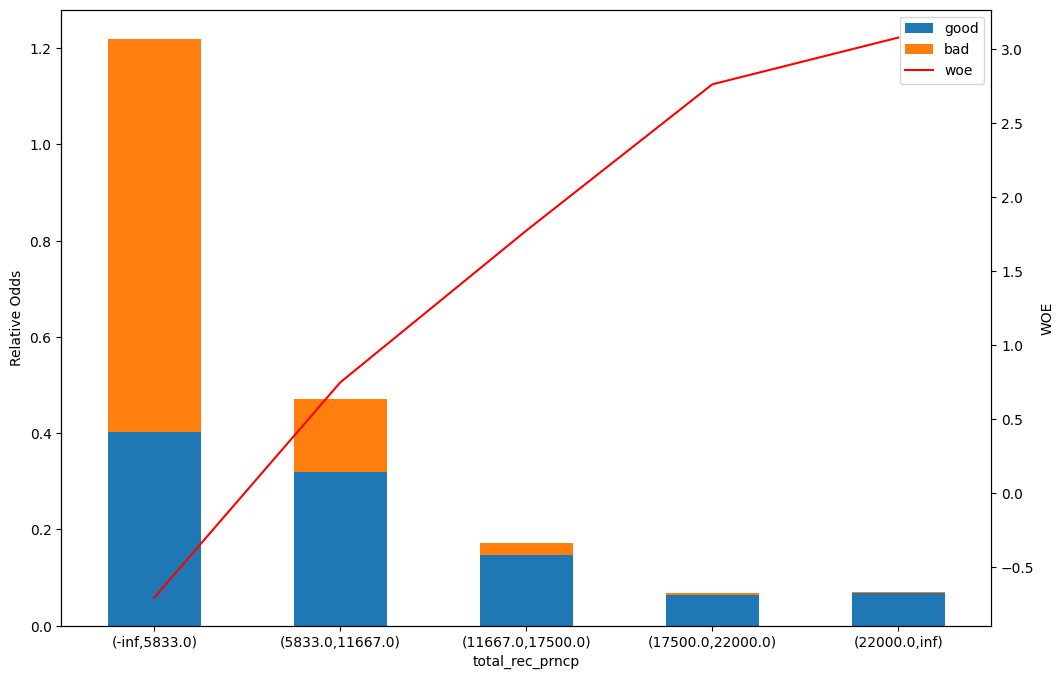

In [26]:
ax = woe_t.woe_mappings["total_rec_prncp"].plot.bar(
    x="total_rec_prncp", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["total_rec_prncp"].plot(
    x="total_rec_prncp", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

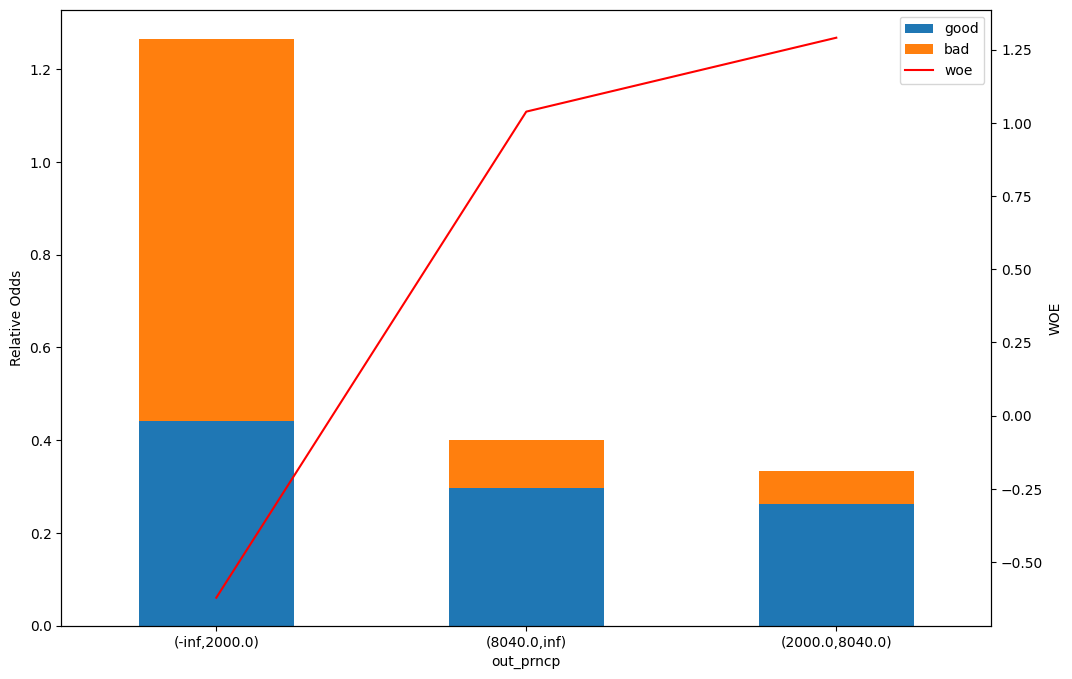

In [27]:
ax = woe_t.woe_mappings["out_prncp"].plot.bar(
    x="out_prncp", y=["good", "bad"], figsize=(12, 8), stacked=True
)

woe_t.woe_mappings["out_prncp"].plot(
    x="out_prncp", y="woe", ax=ax, secondary_y=True, mark_right=False, c="r"
)

ax.right_ax.set_ylabel("WOE")
ax.set_ylabel("Relative Odds");

We decided only to keep the columns with high enough IV to have predicting power

In [28]:
new_cols_to_keep = [
    "int_rate", "out_prncp", "total_rec_prncp", "last_pymnt_amnt", "addr_state",
    "grade", "sub_grade", "total_pymnt"
]

In [29]:
x_train_b = x_train_b.loc[:, new_cols_to_keep]

# Pipelines

We already defined our custom transformers, and since we added a `fit` and `transform` method, we are able to use `sklearn.pipelines` to stack the transformers and models into a single job that is dealing with raw data.

In [30]:
seed = 42069
new_bins = {k: v for k, v in bins.items() if k in new_cols_to_keep}

In [31]:
y_train_nd = [1 if val==0 else 0 for val in y_train.values]

In [32]:
X_train, X_test, y_train_f, y_test_f = train_test_split(x_train_c, y_train_nd, test_size=0.2, random_state=seed)

Dataset is split in 80% training and 20% testing, so theres no overfitting

In [33]:
X_train

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
41407,20000,20000,36 months,19.20,735.15,D,D3,6 years,MORTGAGE,92000.0,...,f,0.00,16176.47000,10507.52,5653.95,15.0,740.00,0.0,306437.0,36100.0
16317,14000,14000,36 months,9.67,449.58,B,B1,1 year,MORTGAGE,65000.0,...,f,6723.31,8991.60000,7276.69,1714.91,0.0,449.58,0.0,284083.0,30500.0
49590,20000,20000,36 months,15.80,701.17,C,C3,10+ years,RENT,95000.0,...,w,0.00,12621.06000,8828.19,3792.87,0.0,701.17,0.0,55973.0,12600.0
11173,8400,8400,36 months,11.67,277.68,B,B4,2 years,OWN,60000.0,...,f,0.00,9019.77000,8400.00,619.77,0.0,3592.97,0.0,54633.0,18200.0
11883,18000,18000,60 months,14.64,424.83,C,C3,4 years,MORTGAGE,51000.0,...,f,12856.67,9346.26000,5143.33,4202.93,0.0,424.83,0.0,136024.0,22500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62286,19800,19800,60 months,16.29,484.56,D,D2,2 years,RENT,45000.0,...,f,0.00,4193.35000,656.15,797.53,0.0,484.56,680.0,31028.0,34000.0
28358,4375,4375,36 months,15.10,151.88,C,C2,10+ years,MORTGAGE,119000.0,...,f,1551.27,3796.48000,2823.73,972.75,0.0,151.88,0.0,755824.0,15200.0
6896,9950,9950,36 months,13.53,337.81,B,B5,1 year,OWN,24000.0,...,w,3771.26,8107.44000,6178.74,1928.70,0.0,337.81,0.0,18918.0,13500.0
23737,5000,5000,36 months,17.77,180.19,D,D1,6 years,RENT,60000.0,...,f,0.00,6501.91000,5000.00,1486.91,15.0,180.26,0.0,22053.0,6800.0


In [34]:
meta_model = LogisticRegression()

In [35]:
# svm_model = SVC(probability=True, random_state=seed)
lregression_model = LogisticRegression(random_state=seed)
rforest_model = RandomForestClassifier(random_state=seed)
gboosting_model = GradientBoostingClassifier(random_state=seed)
# ada_model = AdaBoostClassifier(random_state=seed)

The models used were a Logistic Regression, Random Forest and Gradient Boosting. The 3 models were stacked using another Logistic Regression to choose how much of each model to give to the final prediction

Stacking

In [36]:
stack_model = StackingClassifier(
    classifiers=[rforest_model, gboosting_model, lregression_model],
    meta_classifier=meta_model,
    use_probas=True,
    average_probas=False
)

In [37]:
ml_pipe = Pipeline([
    ('col selector', ColumnSelectorTransformer(columns=new_cols_to_keep)),
    ('bins', BinningTransformer(bins=new_bins)),
    ('woe', WOETransformer(columns=new_cols_to_keep)),
    # ('logistic regression', LogisticRegression(random_state=seed)),
    # ('gdbt', GradientBoostingClassifier(random_state=seed)),
    # ('scaler', StandardScaler()),
    ('stack', stack_model)
])

In [38]:
# y_train_nd = [1 if val==0 else 0 for val in y_train.values]

In [39]:
ml_pipe.fit(X_train, y_train_f)


Pipeline(steps=[('col selector',
                 ColumnSelectorTransformer(['int_rate', 'out_prncp', 'total_rec_prncp', 'last_pymnt_amnt', 'addr_state', 'grade', 'sub_grade', 'total_pymnt'])),
                ('bins', BinningTransformer()),
                ('woe',
                 WOETransformer(columns=['int_rate', 'out_prncp', 'total_rec_prncp', 'last_pymnt_amnt', 'addr_state', 'grade', 'sub_grade', 'total_pymnt'], target_mappings={0: 'good', 1: 'bad'})),
                ('stack',
                 StackingClassifier(classifiers=[RandomForestClassifier(random_state=42069),
                                                 GradientBoostingClassifier(random_state=42069),
                                                 LogisticRegression(random_state=42069)],
                                    meta_classifier=LogisticRegression(),
                                    use_probas=True))])

In [40]:
ml_pipe.score(X_train, y_train_f)

0.8557282422995903

In [41]:
ml_pipe.predict_proba(X_test)

array([[0.04755949, 0.95244051],
       [0.89565895, 0.10434105],
       [0.27950891, 0.72049109],
       ...,
       [0.09568344, 0.90431656],
       [0.79808144, 0.20191856],
       [0.17249131, 0.82750869]])

In [42]:
y_pred = ml_pipe.predict(X_test)
y_prob = ml_pipe.predict_proba(X_test)[:, 1]

In [43]:
fpr, tpr, threshold = roc_curve(y_train_f, ml_pipe.predict_proba(X_train)[:, 1])
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test_f, y_pred)
print(f"ROC AUC: {roc_auc}")
print(f"F1: {f1}")

ROC AUC: 0.9377552057222598
F1: 0.7804031504472033


In [44]:
accuracy = accuracy_score(y_test_f, y_pred)
precision = precision_score(y_test_f, y_pred)
recall = recall_score(y_test_f, y_pred)
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))

Accuracy: 0.7817
Precision: 0.7820
Recall: 0.7788


All metrics from the model were decent

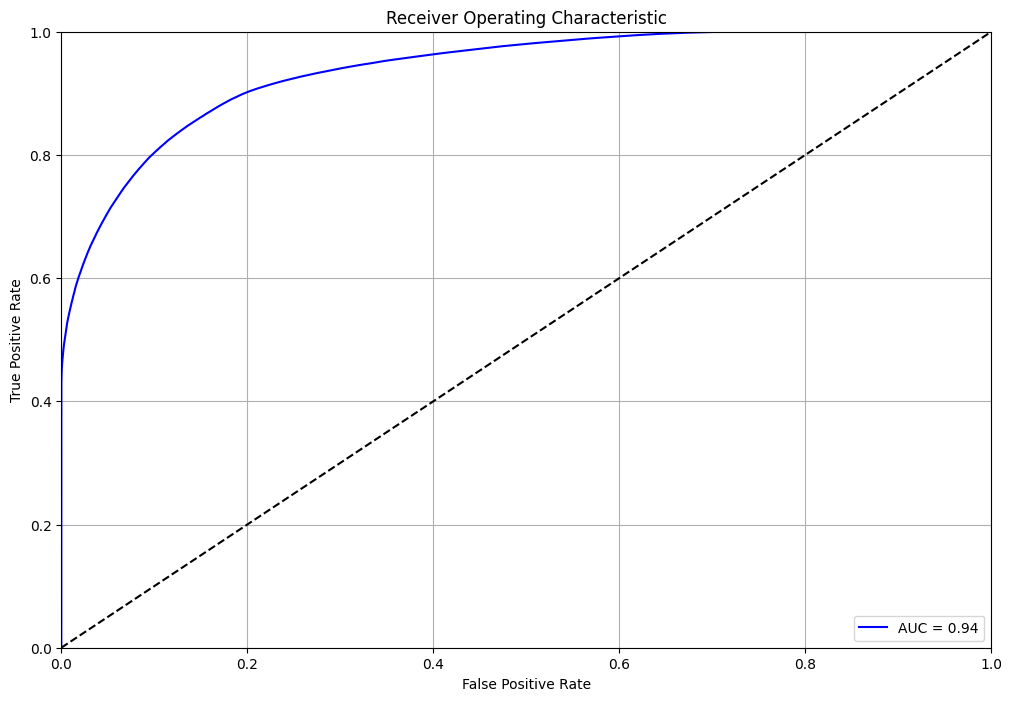

In [45]:
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
predictions = pd.DataFrame({"y_original": y_train_nd, "y_predicted": ml_pipe.predict_proba(x_train_c)[:, 1]})
predictions.head()

,y_original,y_predicted
0,1,0.825051
1,1,0.946522
2,1,0.609818
3,1,0.695855
4,1,0.813976


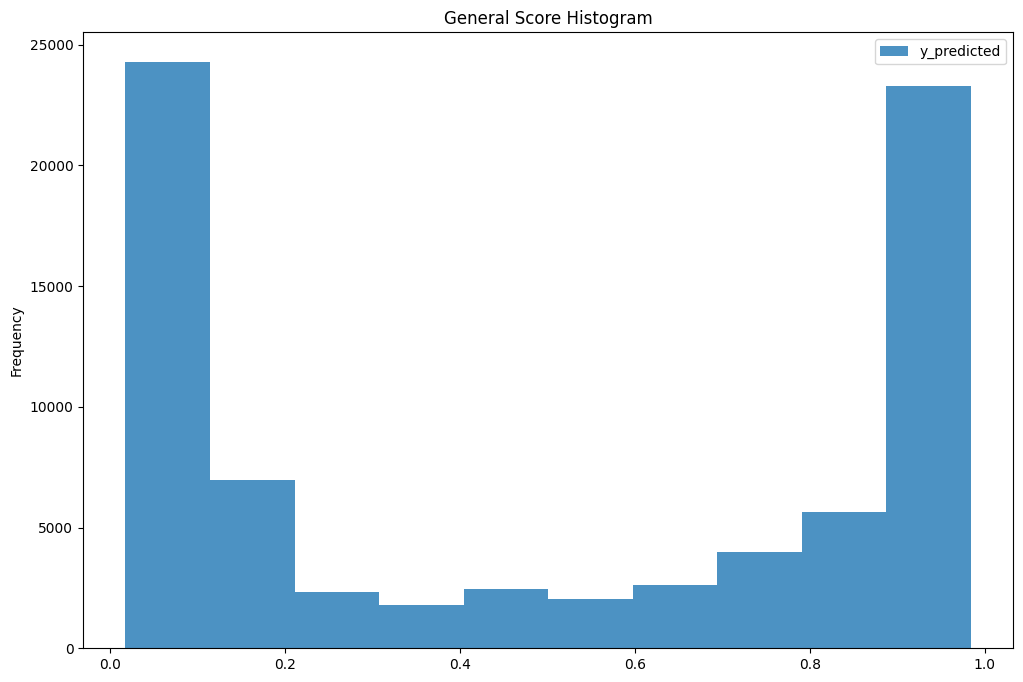

In [47]:
predictions.plot.hist(title="General Score Histogram", y="y_predicted",
                      bins=10, alpha=0.8, figsize=(12, 8));

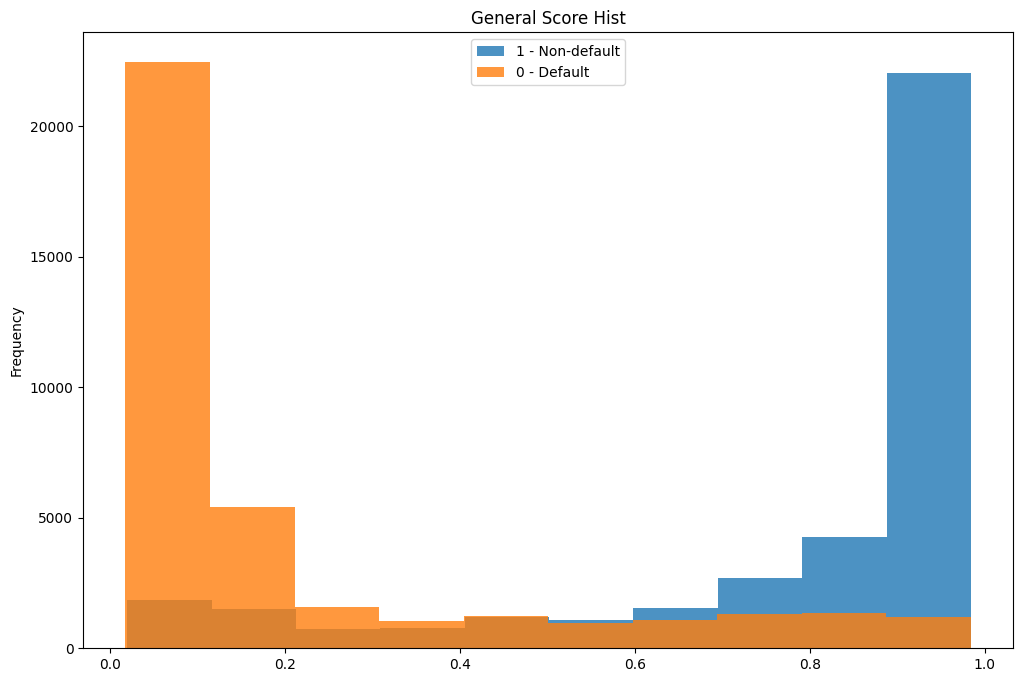

In [48]:
fig, ax = plt.subplots(figsize=(12, 8))

predictions[predictions["y_original"] == 1].plot.hist(title="General Score Hist",
                                                      y="y_predicted",
                                                      bins=10,
                                                      alpha=0.8,
                                                      ax=ax,
                                                      label="1 - Non-default")

predictions[predictions["y_original"] == 0].plot.hist(title="General Score Hist",
                                                      y="y_predicted",
                                                      bins=10,
                                                      alpha=0.8,
                                                      ax=ax,
                                                      label="0 - Default");

In [49]:
predictions[predictions["y_original"] == 0].mean()

y_original     0.000000
y_predicted    0.212225
dtype: float64

In [50]:
predictions[predictions["y_original"] == 1].mean()

y_original     1.000000
y_predicted    0.786802
dtype: float64